請開啟任意 anaconda prompt
輸入：

conda activate finlab

pip install pyfolio==0.9.2

C:\Users\koreal6803\Miniconda3\envs\finlab\lib\site-packages\pyfolio\pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\koreal6803\Miniconda3\envs\finlab\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.t

0.9.2


Start date,2007-04-24
End date,2019-06-12
Total months,142
,Backtest
Annual return,2.7%
Cumulative returns,37.8%
Annual volatility,20.4%
Sharpe ratio,0.23
Calmar ratio,0.05
Stability,0.52
Max drawdown,-59.0%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,58.97,2007-10-11,2008-11-20,2015-04-24,1967
1,23.30,2015-04-27,2016-01-21,2016-10-25,392
2,18.23,2018-01-23,2019-01-04,NaT,NaN
3,14.55,2007-07-25,2007-08-16,2007-10-02,50
4,5.45,2017-11-07,2017-12-26,2018-01-18,53


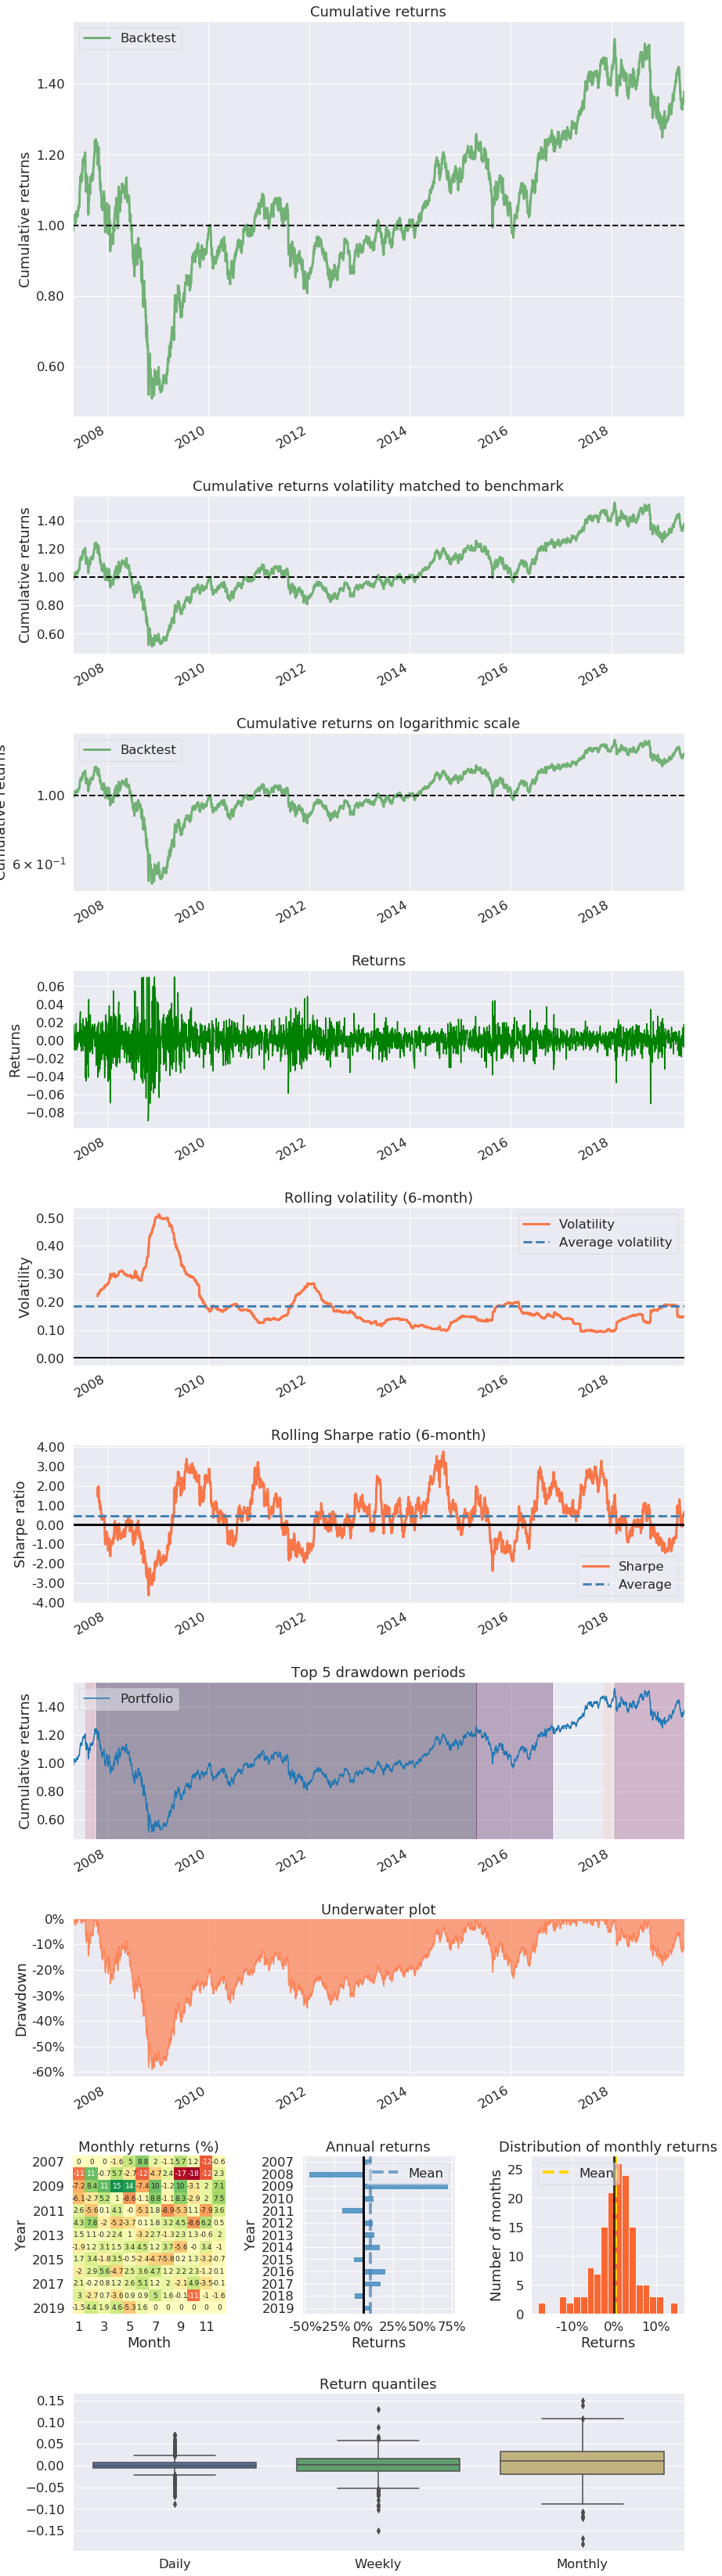

In [1]:
from finlab.data import Data
import pyfolio as pf
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

data = Data()
close = data.get('收盤價')
close.index = pd.to_datetime(close.index).tz_localize('utc')
rets = close['0050'].pct_change().dropna()

print(pf.__version__)
%matplotlib inline
k = pf.create_returns_tear_sheet(rets)
